<a href="https://colab.research.google.com/github/namwootree/Portfolio/blob/main/Competition/Kaggle/Scrabble%20Player%20Rating/DDA_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reference

[Full Walkthrough (EDA + FE + Model Tuning)](https://www.kaggle.com/code/ijcrook/full-walkthrough-eda-fe-model-tuning)

# Setting

## Install

In [125]:
!pip install textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 5.3 MB/s 
     |████████████████████████████████| 2.0 MB 35.1 MB/s 


## Library

In [126]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from tqdm.auto import tqdm
import textstat

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

# Load Data

## Google Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Unzip File

In [ ]:
!unzip -qq '/content/drive/MyDrive/머신러닝 엔지니어링/Kaggle/Scrabble Player Rating/scrabble-player-rating.zip'

## Load Train / Test Data Set

In [ ]:
path_train = '/content/train.csv'
path_games = '/content/games.csv'
path_turns = '/content/turns.csv'

path_test = '/content/test.csv'

In [ ]:
train = pd.read_csv(path_train)
games = pd.read_csv(path_games)
turns = pd.read_csv(path_turns)

test = pd.read_csv(path_test)

# DDA

## DataFrame

In [ ]:
print(train.shape)
train.head()

(100820, 4)


,game_id,nickname,score,rating
0,1,BetterBot,335,1637
1,1,stevy,429,1500
2,3,davidavid,440,1811
3,3,BetterBot,318,2071
4,4,Inandoutworker,119,1473


In [ ]:
print(games.shape)
games.head()

(72773, 12)


,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
1,2,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418
2,3,BetterBot,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262
3,4,BetterBot,regular,RESIGNED,0,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141
4,5,STEEBot,regular,STANDARD,0,2022-09-06 04:31:36,NWL20,1200,0,CASUAL,1,642.688722


In [ ]:
print(turns.shape)
turns.head()

(2005498, 9)


,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
0,1,1,BetterBot,DDEGITT,8G,DIG,10,10,Play
1,1,2,stevy,AEHOPUX,7H,HAP,18,18,Play
2,1,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play
3,1,4,stevy,EMORSUX,5K,UM,16,34,Play
4,1,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play


In [ ]:
print(test.shape)
test.head()

(44726, 4)


,game_id,nickname,score,rating
0,2,Super,488,NaN
1,2,BetterBot,401,2000.0
2,7,STEEBot,377,2082.0
3,7,Priya1,379,NaN
4,11,STEEBot,334,1829.0


## NaN

In [ ]:
print(train.isnull().sum())

game_id     0
nickname    0
score       0
rating      0
dtype: int64


In [ ]:
print(games.isnull().sum())

game_id                  0
first                    0
time_control_name        0
game_end_reason          0
winner                   0
created_at               0
lexicon                  0
initial_time_seconds     0
increment_seconds        0
rating_mode              0
max_overtime_minutes     0
game_duration_seconds    0
dtype: int64


In [ ]:
print(turns.isnull().sum())

game_id             0
turn_number         0
nickname            0
rack            69390
location       132239
move              454
points              0
score               0
turn_type         395
dtype: int64


In [ ]:
print(test.isnull().sum())

game_id         0
nickname        0
score           0
rating      22363
dtype: int64


## Train

In [ ]:
train.columns

Index(['game_id', 'nickname', 'score', 'rating'], dtype='object')

In [ ]:
train['game_id'].value_counts()

1        2
48498    2
48505    2
48509    2
48512    2
        ..
24193    2
24194    2
24196    2
24197    2
72773    2
Name: game_id, Length: 50410, dtype: int64

In [ ]:
train['nickname'].value_counts()

HastyBot       17346
BetterBot      16602
STEEBot        16462
BB-8            6576
pandorable      1759
               ...  
Patchara           1
Coggles            1
Nonna2trips        1
SamuelJam          1
kacattac           1
Name: nickname, Length: 1031, dtype: int64

In [ ]:
train[['score', 'rating']].describe()

,score,rating
count,100820.000000,100820.000000
mean,399.029022,1875.592938
std,75.184778,231.791016
min,-64.000000,1033.000000
25%,352.000000,1664.000000
50%,398.000000,1907.000000
75%,445.000000,2060.000000
max,1132.000000,2510.000000


## Games

In [ ]:
games.columns

Index(['game_id', 'first', 'time_control_name', 'game_end_reason', 'winner',
       'created_at', 'lexicon', 'initial_time_seconds', 'increment_seconds',
       'rating_mode', 'max_overtime_minutes', 'game_duration_seconds'],
      dtype='object')

In [ ]:
games['game_id'].value_counts()

1        1
48515    1
48521    1
48520    1
48519    1
        ..
24264    1
24265    1
24266    1
24267    1
72773    1
Name: game_id, Length: 72773, dtype: int64

In [ ]:
games['first'].value_counts()

STEEBot         12210
BetterBot       12014
HastyBot        11632
BB-8             3288
hannahbanana     1008
                ...  
Anita_H             1
Sokhim1             1
jvp                 1
Anbu                1
kacattac            1
Name: first, Length: 1314, dtype: int64

In [ ]:
games['time_control_name'].value_counts()

regular       60282
rapid          6652
blitz          4468
ultrablitz     1371
Name: time_control_name, dtype: int64

In [ ]:
games['game_end_reason'].value_counts()

STANDARD              67987
RESIGNED               2346
TIME                   2202
CONSECUTIVE_ZEROES      238
Name: game_end_reason, dtype: int64

In [ ]:
games['winner'].value_counts()

 0    46713
 1    25792
-1      268
Name: winner, dtype: int64

In [ ]:
games['lexicon'].value_counts()

CSW21     44594
NWL20     21250
ECWL       6925
NSWL20        4
Name: lexicon, dtype: int64

In [ ]:
games['rating_mode'].value_counts()

RATED     54076
CASUAL    18697
Name: rating_mode, dtype: int64

In [ ]:
games[['initial_time_seconds', 'increment_seconds',
       'max_overtime_minutes', 'game_duration_seconds']].describe()

,initial_time_seconds,increment_seconds,max_overtime_minutes,game_duration_seconds
count,72773.000000,72773.00000,72773.000000,72773.000000
mean,1198.034230,0.22856,2.143707,484.069347
std,713.185219,2.54802,2.989853,333.563128
min,15.000000,0.00000,0.000000,7.962989
25%,900.000000,0.00000,1.000000,250.172459
50%,1200.000000,0.00000,1.000000,399.834150
75%,1200.000000,0.00000,1.000000,633.424285
max,3600.000000,60.00000,10.000000,4444.821645


## Turns

In [ ]:
turns['nickname'].value_counts()

BetterBot       360931
STEEBot         333276
HastyBot        309554
BB-8             92896
hannahbanana     26299
                 ...  
smashsmash          10
conrad              10
mpd                 10
KLG_SMKSI           10
ARIEFAHMAD           9
Name: nickname, Length: 1471, dtype: int64

In [ ]:
turns['rack'].value_counts()

I          2900
U          1883
E          1780
R          1772
N          1655
           ... 
?HJNOOR       1
?ABJLNP       1
?ABJNUX       1
?BISTUZ       1
EGHIIP        1
Name: rack, Length: 626752, dtype: int64

In [ ]:
turns['location'].value_counts()

15A    24190
H1     23894
8D     23499
O1     23377
8G     22077
       ...  
E14      178
13N      141
3N       121
M14      103
C14       86
Name: location, Length: 418, dtype: int64

In [ ]:
turns['move'].value_counts()

--          14302
QI          14221
Q.          10318
-            8065
.I           5167
            ...  
PHA.IC          1
REAlO           1
STRIVIN.        1
JU.TICE         1
SPINTOS         1
Name: move, Length: 356847, dtype: int64

In [ ]:
turns['turn_type'].value_counts()

Play             1872864
End                67987
Exchange           48997
Pass                8065
Timeout             4143
Challenge           2571
Six-Zero Rule        476
Name: turn_type, dtype: int64

In [ ]:
turns[['turn_number', 'points', 'score']].describe()

,turn_number,points,score
count,2.005498e+06,2.005498e+06,2.005498e+06
mean,1.453798e+01,2.900326e+01,2.270914e+02
std,8.434285e+00,2.210145e+01,1.343110e+02
min,1.000000e+00,-2.210000e+02,-6.400000e+01
25%,7.000000e+00,1.600000e+01,1.130000e+02
50%,1.400000e+01,2.400000e+01,2.240000e+02
75%,2.100000e+01,3.600000e+01,3.320000e+02
max,7.500000e+01,3.110000e+02,1.171000e+03


# EDA

## Target Variable

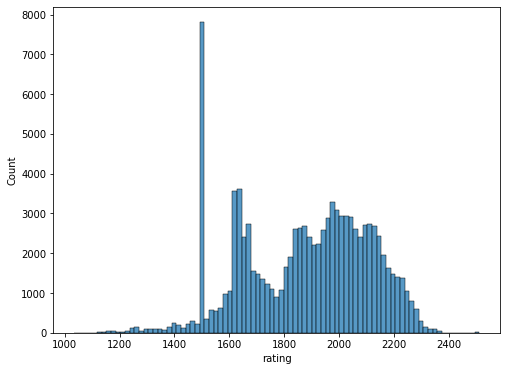

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(train['rating'], ax=plt.gca())

In [ ]:
print_mode(train, 'rating')

rating의 최빈값 1순위 : 1500 & 7575개
rating의 최빈값 2순위 : 1640 & 1857개
rating의 최빈값 3순위 : 1614 & 1591개


In [ ]:
def print_mode(df, col):

  cnt = Counter(df[col])
  list_cnt = cnt.most_common(3)

  for idx, value in enumerate(list_cnt):

    print(f'{col}의 최빈값 {idx+1}순위 : {value[0]} & {value[-1]}개')

## EDA of the Games

### Without Bot player

In [ ]:
list_Bots = []

for nick in tqdm(train['nickname']):

  if 'Bot' in nick:

    if nick not in list_Bots:

      list_Bots.append(nick)

print('DONE')
print(list_Bots)

  0%|          | 0/100820 [00:00<?, ?it/s]

DONE
['BetterBot', 'STEEBot', 'HastyBot', 'MasterBot']


Text(0.5, 0.98, 'Cummulative distibution of number of games per player')

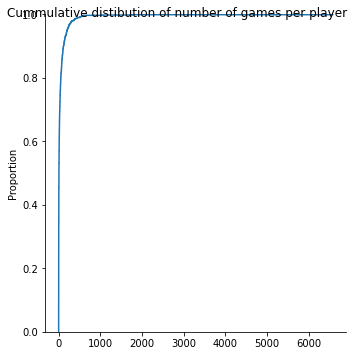

In [ ]:
names, counts = np.unique(train[~train['nickname'].isin(list_Bots)]['nickname'],
                          return_counts=True)

plot = sns.displot(counts, kind='ecdf')
plot.fig.suptitle("Cummulative distibution of number of games per player")

In [ ]:
print("most games per account: {}".format(np.sort(counts)[-10:]))
print("mean games per account: {}".format(np.mean(counts)))
print("median games per account: {}".format(np.median(counts)))

most games per account: [ 503  511  522  555  561  576  592 1029 1759 6576]
mean games per account: 49.074975657254136
median games per account: 8.0


### With Bot Player

In [ ]:
train.columns

Index(['game_id', 'nickname', 'score', 'rating'], dtype='object')

In [ ]:
bot_df = train[["game_id", "nickname", "score", "rating"]].copy()

bot_df['bot_name'] = bot_df['nickname'].apply(lambda x: x if x in list_Bots else np.nan)
bot_df = bot_df[["game_id", "score", "rating", "bot_name"]].dropna(subset=["bot_name"])
bot_df.columns = ["game_id", "bot_score", "bot_rating", "bot_name"]

In [ ]:
bot_df.head()

,game_id,bot_score,bot_rating,bot_name
0,1,335,1637,BetterBot
3,3,318,2071,BetterBot
5,4,478,1936,BetterBot
7,5,427,1844,STEEBot
9,6,427,2143,STEEBot


### Merge Human & Bot

In [ ]:
full_df = train[~train['nickname'].isin(list_Bots)] #take out the bots
full_df = full_df.merge(bot_df, on="game_id") #add in bot information
full_df = full_df.merge(games, on="game_id") # add in game information
full_df["created_at"] = pd.to_datetime(full_df["created_at"])

In [ ]:
full_df.head()

,game_id,nickname,score,rating,bot_score,bot_rating,bot_name,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,1,stevy,429,1500,335,1637,BetterBot,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
1,3,davidavid,440,1811,318,2071,BetterBot,BetterBot,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262
2,4,Inandoutworker,119,1473,478,1936,BetterBot,BetterBot,regular,RESIGNED,0,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141
3,5,stevy,325,1500,427,1844,STEEBot,STEEBot,regular,STANDARD,0,2022-09-06 04:31:36,NWL20,1200,0,CASUAL,1,642.688722
4,6,HivinD,378,2029,427,2143,STEEBot,HivinD,regular,STANDARD,0,2022-08-21 14:56:35,CSW21,900,0,RATED,1,426.950541


### Check Sample 

In [ ]:
sample_nick = full_df["nickname"].sample(1).values[0]

print(sample_nick)

Abdulmumin


In [ ]:
full_df[full_df["nickname"]==sample_nick].sort_values(by="created_at")[["created_at", "rating", "bot_name"]]

,created_at,rating,bot_name
14816,2022-08-21 08:06:57,2117,STEEBot
49086,2022-08-21 08:10:02,2128,STEEBot
9897,2022-08-21 08:13:23,2139,STEEBot
15018,2022-08-22 15:31:38,2129,STEEBot
45613,2022-08-22 15:35:22,2140,STEEBot
...,...,...,...
46859,2022-09-20 07:55:32,2183,HastyBot
50080,2022-09-20 12:57:13,2158,HastyBot
20335,2022-09-20 13:00:44,2147,HastyBot
32916,2022-09-21 06:26:57,2137,HastyBot


Text(0.5, 1.0, 'Player Abdulmumin scores over the course of thier games, by bot')

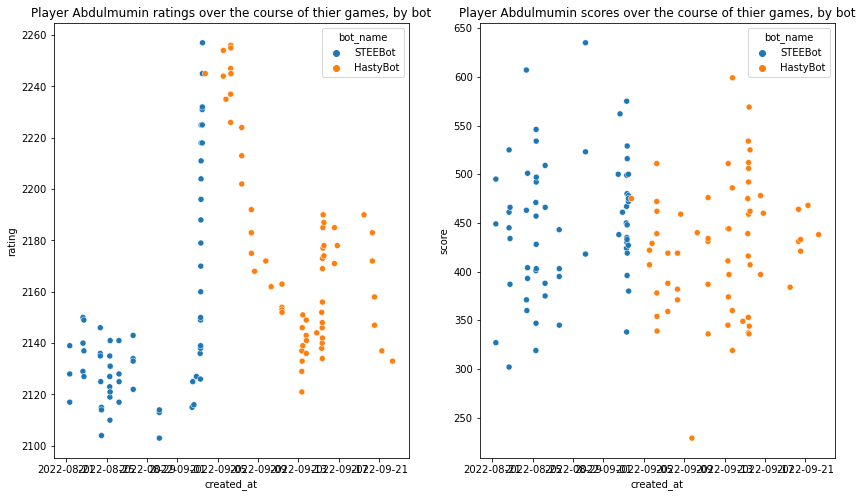

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,8))

sns.scatterplot(data = full_df[full_df["nickname"]==sample_nick].sort_values(by="created_at")[["created_at", "rating", "bot_name"]],
                x="created_at",
                y="rating",
                hue="bot_name",
                ax=axes[0])
axes[0].set_title("Player {} ratings over the course of thier games, by bot".format(sample_nick))

sns.scatterplot(data = full_df[full_df["nickname"]==sample_nick].sort_values(by="created_at")[["created_at", "score", "bot_name"]],
                x="created_at",
                y="score",
                hue="bot_name",
                ax=axes[1])
axes[1].set_title("Player {} scores over the course of thier games, by bot".format(sample_nick))

### 1500등 유저 분석

In [ ]:
users, counts = np.unique(full_df[full_df['rating'] == 1500]['nickname'],
                          return_counts=True)

print("number of users with 1500 rating: {}".format(len(users)))

number of users with 1500 rating: 108


In [ ]:
print("users with a high number of 1500 ratings: ")
print(users[np.argsort(counts)[::-1][:34]])

users with a high number of 1500 ratings: 
['BB-8' 'stevy' 'CobaltBlue' 'TT9000' 'MankDemes' 'evatt' 'matterhorn'
 'naushika' 'Best459' 'CodeTitan' 'SGP' 'HaDZ' 'TheOneWhoKnocks' 'Alexaa'
 'thyme' 'Piro' 'marcmyword' 'replacehim' 'Scal' 'J-Oriola' 'Kidikibudi'
 'puddingy1' 'Pranjal1307' 'BethMix' 'Mollygardner' 'Nickphone'
 'SmartGoose' 'thompson8295' 'suffixt' 'Toronto2' 'tripack' 'Arnav1'
 'Bingobabe' 'Casty']


In [ ]:
print("...and their counts of 1500 ratings: ")
print(counts[np.argsort(counts)[::-1][:34]])

...and their counts of 1500 ratings: 
[6576  410   99   89   81   51   35   27   17   16   14   13    9    7
    7    6    3    3    3    3    3    3    3    3    2    2    2    2
    2    2    2    2    2    2]


In [ ]:
def display_df(nick_name):
  
  print(f'nick name : {nick_name}')
  display(full_df[full_df["nickname"]==nick_name].sort_values(by="created_at")[["created_at", "rating", "bot_name"]])

In [ ]:
def display_rating_score(nick_name):
  fig, axes = plt.subplots(1, 2, figsize=(16,8))

  sns.scatterplot(data = full_df[full_df["nickname"]==nick_name].sort_values(by="created_at")[["created_at", "rating", "bot_name"]], x="created_at", y="rating", hue="bot_name", ax=axes[0])
  axes[0].set_title("Player {} ratings over the course of their games, by bot".format(nick_name))

  sns.scatterplot(data = full_df[full_df["nickname"]==nick_name].sort_values(by="created_at")[["created_at", "score", "bot_name"]], x="created_at", y="score", hue="bot_name", ax=axes[1])
  axes[1].set_title("Player {} scores over the course of their games, by bot".format(nick_name))

  plt.show()

#### BB-8

In [ ]:
display_df(nick_name = 'BB-8')

nick name : BB-8


,created_at,rating,bot_name
30504,2022-08-26 06:00:26,1500,HastyBot
12110,2022-08-26 06:05:42,1500,HastyBot
47164,2022-08-26 06:10:01,1500,HastyBot
31576,2022-08-26 06:14:56,1500,HastyBot
13207,2022-08-26 06:20:02,1500,HastyBot
...,...,...,...
394,2022-09-23 15:15:49,1500,HastyBot
17166,2022-09-23 15:20:13,1500,HastyBot
5923,2022-09-23 15:24:34,1500,HastyBot
27343,2022-09-23 15:30:16,1500,HastyBot


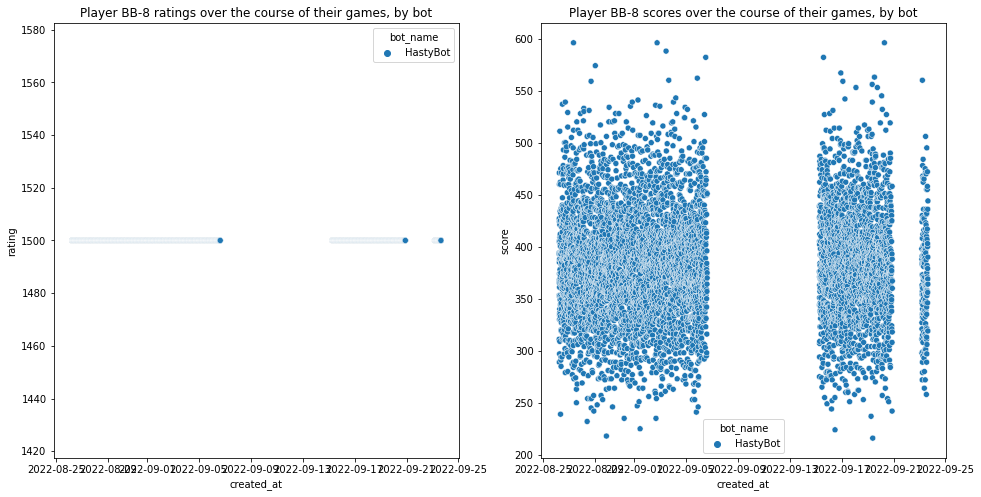

In [ ]:
display_rating_score(nick_name = 'BB-8')

#### stevy

In [ ]:
display_df(nick_name = 'stevy')

nick name : stevy


,created_at,rating,bot_name
29368,2022-08-05 22:55:31,1500,BetterBot
580,2022-08-05 23:09:59,1500,BetterBot
6557,2022-08-05 23:23:45,1500,BetterBot
19060,2022-08-05 23:38:19,1500,BetterBot
28429,2022-08-05 23:55:52,1500,BetterBot
...,...,...,...
21841,2022-09-23 00:34:52,1500,STEEBot
2804,2022-09-23 00:46:18,1500,STEEBot
4956,2022-09-23 01:04:52,1500,STEEBot
19020,2022-09-23 01:20:57,1500,STEEBot


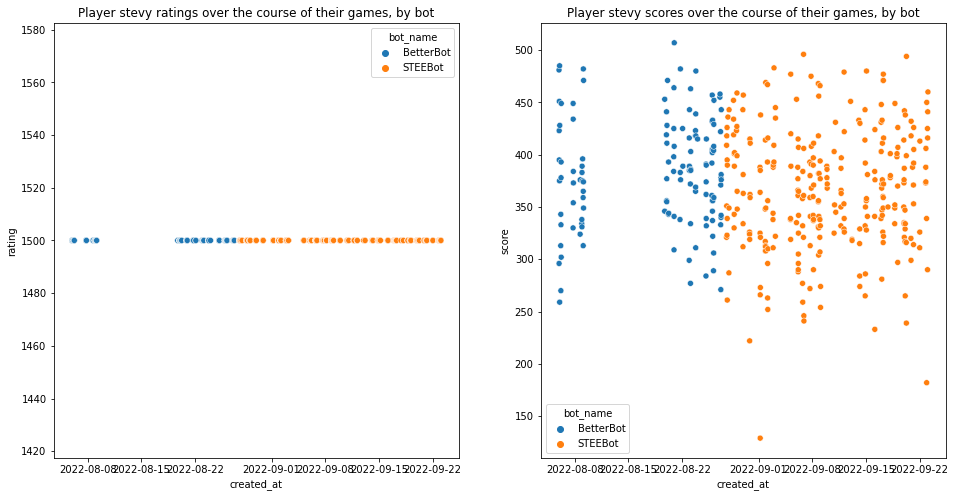

In [ ]:
display_rating_score(nick_name = 'stevy')

#### BethMix

In [ ]:
display_df(nick_name = 'BethMix')

nick name : BethMix


,created_at,rating,bot_name
26869,2022-08-07 01:32:07,1491,BetterBot
23197,2022-08-09 03:32:40,1608,STEEBot
613,2022-08-09 18:50:03,1604,STEEBot
49970,2022-08-09 18:59:12,1618,STEEBot
16876,2022-08-10 20:33:42,1608,STEEBot
...,...,...,...
27687,2022-09-22 20:30:18,1569,HastyBot
12883,2022-09-22 23:46:57,1567,HastyBot
15020,2022-09-22 23:51:53,1565,HastyBot
15628,2022-09-23 00:46:05,1563,HastyBot


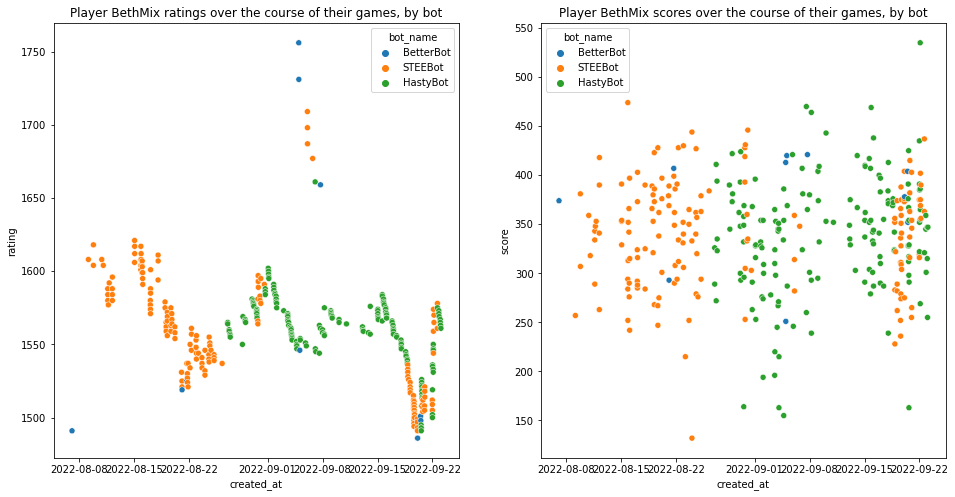

In [ ]:
display_rating_score(nick_name = 'BethMix')

### number of accounts that only have 1500 ratings and more than one game

In [ ]:
df = full_df[full_df['nickname'].isin(users)][['nickname', 'rating']].groupby('nickname').agg({"nickname":"count",
                                                                                         "rating" : lambda x: np.sum(x == 1500)
                                                                                         })
df["ratio"] = df["rating"]/df["nickname"]
print("number of accounts that only have 1500 ratings and more than one game: {}".format(len(df[(df["ratio"] >=1.0) & (df["nickname"]>1)])))

number of accounts that only have 1500 ratings and more than one game: 20


In [ ]:
df[(df["ratio"] >=1.0) & (df["nickname"]>1)]

,nickname,rating,ratio
nickname,,,
Alexaa,7,7,1.0
BB-8,6576,6576,1.0
CobaltBlue,99,99,1.0
CodeTitan,16,16,1.0
HaDZ,13,13,1.0
Kidikibudi,3,3,1.0
MankDemes,81,81,1.0
Nickphone,2,2,1.0
SGP,14,14,1.0


### Turning to any possible positive correlations between variables

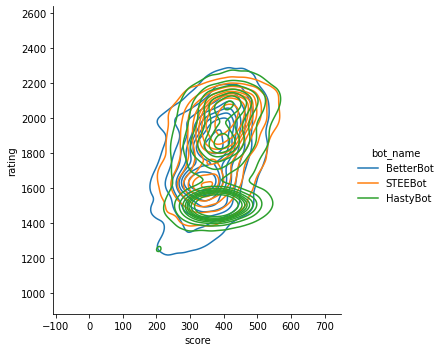

In [ ]:
sns.displot(full_df[["rating", "score", "bot_name"]], x="score", y="rating", hue="bot_name", kind="kde")

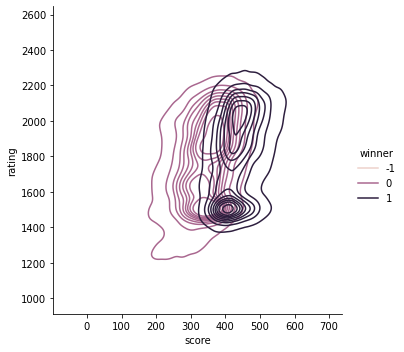

In [ ]:
sns.displot(full_df[["rating", "score", "winner"]], x="score", y="rating", hue="winner", kind="kde")

### Take a look at some of the player performance stats

In [117]:
player_avg_performance = full_df[["nickname","score",
                                  "rating", "winner",
                                  "game_duration_seconds"]]\
                                  .groupby("nickname")\
                                  .agg({"score":"mean", 
                                        "rating":"mean", 
                                        "winner":"sum", 
                                        "nickname":"count",
                                        "game_duration_seconds":"mean"        
                                        })
                                  
player_avg_performance["win_ratio"] = player_avg_performance["winner"] / player_avg_performance["nickname"]

In [118]:
player_avg_performance.head()

,score,rating,winner,nickname,game_duration_seconds,win_ratio
nickname,,,,,,
0188889876,15.000000,1979.000000,0,1,61.405180,0.000000
0927399533,237.578947,1484.473684,1,19,1122.674674,0.052632
1,356.500000,1632.000000,0,2,352.108487,0.000000
171_selene,328.400000,1931.000000,1,5,871.676149,0.200000
220674_ZAVEPHUA,304.300000,1551.033333,4,30,429.657429,0.133333


Text(0.5, 0.98, 'Distribution of scores by ratings, averaged over each player')

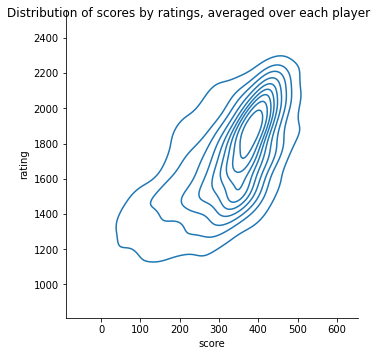

In [119]:
plot = sns.displot(player_avg_performance, x="score", y="rating", kind="kde")
plot.fig.suptitle("Distribution of scores by ratings, averaged over each player")

Text(0.5, 0.98, 'Distribution of the win ratio by ratings, averaged over each player')

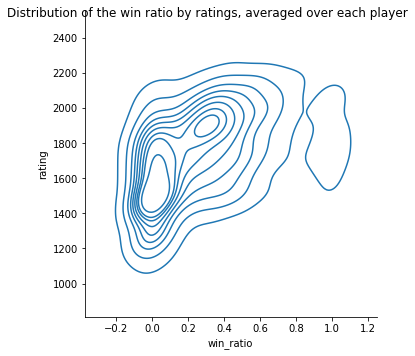

In [120]:
plot = sns.displot(player_avg_performance, x="win_ratio", y="rating", kind="kde")
plot.fig.suptitle("Distribution of the win ratio by ratings, averaged over each player")

Text(0.5, 0.98, 'Distribution of game duration by ratings, averaged over each player')

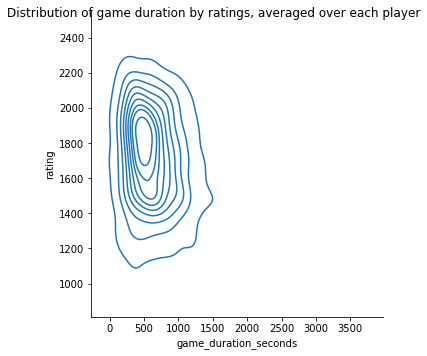

In [121]:
plot = sns.displot(player_avg_performance, x="game_duration_seconds", y="rating", kind="kde")
plot.fig.suptitle("Distribution of game duration by ratings, averaged over each player")

### Calculation of correlations of player stats with their ratings

In [122]:
print("Correlation between a players average score and their average rating {:.3f}".format(player_avg_performance["score"].corr(player_avg_performance["rating"])))
print("Correlation between a players number of wins and their average rating {:.3f}".format(player_avg_performance["score"].corr(player_avg_performance["winner"])))
print("Correlation between a players average win ratio and their average rating {:.3f}".format(player_avg_performance["score"].corr(player_avg_performance["win_ratio"])))
print("Correlation between a players average game duration and their average rating {:.3f}".format(player_avg_performance["score"].corr(player_avg_performance["game_duration_seconds"])))

Correlation between a players average score and their average rating 0.611
Correlation between a players number of wins and their average rating 0.102
Correlation between a players average win ratio and their average rating 0.641
Correlation between a players average game duration and their average rating 0.021


## EDA of the Turns

In [123]:
turns.head()

,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
0,1,1,BetterBot,DDEGITT,8G,DIG,10,10,Play
1,1,2,stevy,AEHOPUX,7H,HAP,18,18,Play
2,1,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play
3,1,4,stevy,EMORSUX,5K,UM,16,34,Play
4,1,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play


In [127]:
def fe_turns(df):

    df["rack_len"] = df["rack"].str.len()
    df["rack_len_less_than_7"] = df["rack_len"].apply(lambda x : x <7)
    df["move_len"] = df["move"].str.len()
    df["move"].fillna("None",inplace=True)
    df["difficult_word"] = df["move"].apply(textstat.difficult_words)
    
    df["turn_type"].fillna("None",inplace=True)
    turn_type_unique = df["turn_type"].unique()
    df = pd.get_dummies(df, columns=["turn_type"])
    dummy_features = [f"turn_type_{value}" for value in turn_type_unique]
    
    char_map = {
        'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8,
        'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15,
    }
    df['y'] = df["location"].str.extract('(\d+)')[0].values
    df['y'].fillna("0",inplace=True)
    df["y"] = df["y"].astype(int)
    
    df["x"] = df["location"].str.extract('([A-Z])')[0].values
    df["x"].replace(char_map, inplace=True)
    df['x'].fillna("0",inplace=True)
    df["x"] = df["x"].astype(int)
    
    df["direction_of_play"] = df["location"].apply(lambda x: 1 if str(x)[0].isdigit() else 0)
    
    df["curr_board_pieces_used"] = df["move"].apply(lambda x: str(x).count(".") + sum(int(c.islower()) for c in str(x)))
    
    return df, dummy_features

In [128]:
turns_fe, dummy_features = fe_turns(turns.copy())

In [129]:
avg_features = ["points", "move_len", "difficult_word",
                "curr_board_pieces_used", "direction_of_play"]

sum_features = ["difficult_word", "rack_len_less_than_7"]+dummy_features

max_features = ["move_len", "points"]

agg_func = {feature:'sum' for feature in dummy_features}

agg_func.update({
    "points":["mean", "max"],
    "move_len":["mean", "max"],
    "difficult_word":["mean", "sum"],
    "curr_board_pieces_used": "mean",
    "direction_of_play": "mean",
    "rack_len_less_than_7" : "sum"})

turns_grouped = turns_fe.groupby(["game_id", "nickname"], as_index=False).agg(agg_func)
turns_grouped.columns = ["_".join(a) if a[0] not in ["game_id", "nickname"] else a[0] for a in turns_grouped.columns.to_flat_index()]

In [130]:
full_df = full_df.merge(turns_grouped, how="left", on=["game_id", "nickname"])

In [131]:
full_df.head()

,game_id,nickname,score,rating,bot_score,bot_rating,bot_name,first,time_control_name,game_end_reason,...,turn_type_None_sum,points_mean,points_max,move_len_mean,move_len_max,difficult_word_mean,difficult_word_sum,curr_board_pieces_used_mean,direction_of_play_mean,rack_len_less_than_7_sum
0,1,stevy,429,1500,335,1637,BetterBot,BetterBot,regular,STANDARD,...,0,30.642857,98,3.857143,7.0,0.071429,1,0.428571,0.714286,2
1,3,davidavid,440,1811,318,2071,BetterBot,BetterBot,regular,STANDARD,...,0,31.428571,103,4.357143,7.0,0.142857,2,0.428571,0.142857,1
2,4,Inandoutworker,119,1473,478,1936,BetterBot,BetterBot,regular,RESIGNED,...,0,8.500000,26,2.928571,7.0,0.071429,1,0.928571,0.642857,0
3,5,stevy,325,1500,427,1844,STEEBot,STEEBot,regular,STANDARD,...,0,20.312500,51,3.375000,6.0,0.062500,1,0.312500,0.500000,2
4,6,HivinD,378,2029,427,2143,STEEBot,HivinD,regular,STANDARD,...,0,31.500000,74,4.750000,6.0,0.166667,2,0.666667,0.500000,0


In [133]:
full_df.columns

Index(['game_id', 'nickname', 'score', 'rating', 'bot_score', 'bot_rating',
       'bot_name', 'first', 'time_control_name', 'game_end_reason', 'winner',
       'created_at', 'lexicon', 'initial_time_seconds', 'increment_seconds',
       'rating_mode', 'max_overtime_minutes', 'game_duration_seconds',
       'turn_type_Play_sum', 'turn_type_End_sum', 'turn_type_Exchange_sum',
       'turn_type_Pass_sum', 'turn_type_Timeout_sum',
       'turn_type_Challenge_sum', 'turn_type_Six-Zero Rule_sum',
       'turn_type_None_sum', 'points_mean', 'points_max', 'move_len_mean',
       'move_len_max', 'difficult_word_mean', 'difficult_word_sum',
       'curr_board_pieces_used_mean', 'direction_of_play_mean',
       'rack_len_less_than_7_sum'],
      dtype='object')

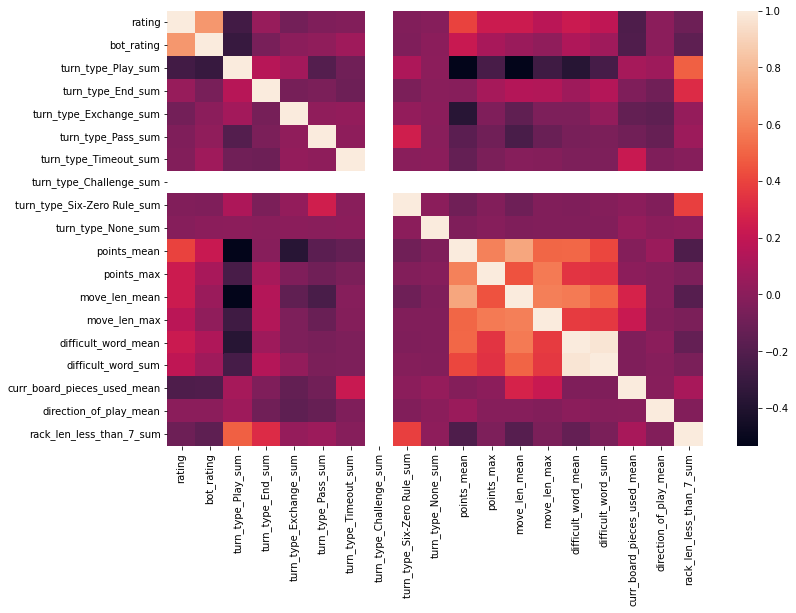

In [132]:
plt.figure(figsize=(12,8))
sns.heatmap(full_df[['rating', 'bot_rating'] +list(turns_grouped.columns[2:])].corr())